# Spectral (30 - 60 pts)

### 1. Explain Spectral clustering and different types of Laplassians

**The basic idea:**

- Project your data into $R^{n}$
- Define an Affinity  matrix $A$  , using a Gaussian Kernel $K$  or say just an Adjacency matrix (i.e. $A_{i,j}=\delta_{i,j}$) 
- Construct the Graph Laplacian from $A$  (i.e. decide on a normalization)
- Solve an Eigenvalue problem , such as $L v=\lambda v$   (or a Generalized Eigenvalue problem $L v=\lambda D v $)
- Select $k$ eigenvectors $\{ v_{i}, i=1, k \}$  corresponding to the k lowest (or highest) eigenvalues  $\{ \lambda_{i}, i=1, k \}$ , to define a $k$-dimensional subspace $P^{t}LP$ 
- Form clusters in this subspace using, say, $k$-means

### 2. Given Data

In [0]:
import numpy as np
import matplotlib.pyplot as plt

**Affinity matrix**

What is an **Affinity**?  It is a metric that determines how close, or **Similar**, two points in our space. 

Given 2 data points $x_{i},x_{j}$  (projected in $R^{n}$ ), we define an Affinity $A_{i,j}$  that is positive, symmetric, and depends on the Euclidian distance $\Vert x_{i}-x_{j}\Vert$  between the data points

$A_{i,j}\simeq exp(-\alpha \Vert x_{i}-x_{j}\Vert^{2}) $

We might provide a hard cut off R , so that

$A_{i,j}= 0$  if $\Vert x_{i}-x_{j}\Vert^{2}\geq R$

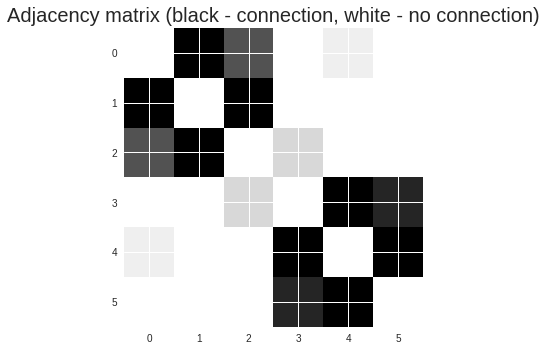

In [0]:
A = np.array(
[[0.0, 0.8, 0.6, 0.0, 0.1, 0.0],
[0.8, 0.0, 0.8, 0.0, 0.0, 0.0],
[0.6, 0.8, 0.0, 0.2, 0.0, 0.0],
[0.0, 0.0, 0.2, 0.0, 0.8, 0.7],
[0.1, 0.0, 0.0, 0.8, 0.0, 0.8],
[0.0, 0.0, 0.0, 0.7, 0.8, 0.0]]
)
plt.imshow(A, interpolation='nearest')
plt.title("Adjacency matrix (black - connection, white - no connection)", fontsize=20)
_ = plt.show()

As we can see in the plot, the first three have intermediate connections with weight higher than 0.6 and have weaker connections with other samples. Same for the other three samples. That means there are two clusters - first three samples and other three samples.

**Unnormalized Laplacian matrix**

They all share the **Degree matrix** $D$ .    The **Degree matrix** is a diagonal matrix that measures the degree at each node
$D_{i,i}=\sum^{n}_{j}a_{i,j} $

Simple Laplacian $L=D-A$ was given

In [0]:
L = np.array(
[[1.5, -0.8, -0.6, 0.0, -0.1, 0.0],
[-0.8, 1.6, -0.8, 0.0, 0.0, 0.0],
[-0.6, -0.8, 1.6, -0.2, 0.0, 0.0],
[0.0, 0.0, -0.2, 1.7, -0.8, -0.7],
[-0.1, 0.0, 0.0, -0.8, 1.7, -0.8],
[0.0, 0.0, 0.0, -0.7, -0.8, 1.5]]
)

### 3. Perform the rest of steps for spectral clustering

Eigenvalues:
[1.38777878e-16 1.88184190e-01 2.08400608e+00 2.28529798e+00
 2.46902494e+00 2.57348681e+00]
Eigenvectors:
[[-0.40824829 -0.40840058  0.6469088   0.30546656 -0.37882457 -0.10598786]
 [-0.40824829 -0.44182489 -0.01441501 -0.30450981  0.70632065 -0.21517718]
 [-0.40824829 -0.37131863 -0.63818761 -0.04461661 -0.38843825  0.36782805]
 [-0.40824829  0.37133377 -0.33863293  0.45451793 -0.00099624 -0.61170644]
 [-0.40824829  0.40504751  0.16645901  0.30495543  0.35096892  0.65221488]
 [-0.40824829  0.44516283  0.17786774 -0.71581349 -0.28903051 -0.08717145]]


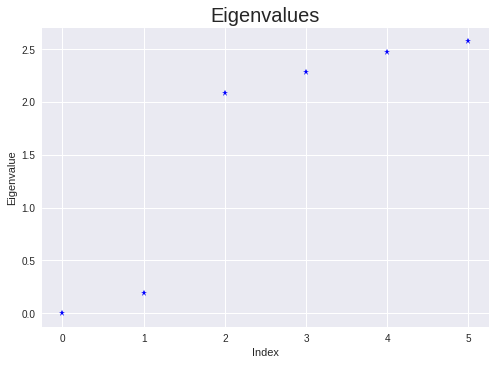

In [0]:
eigenvalues, eigenvectors = np.linalg.eig(L)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

ev = eigenvectors[np.argsort(eigenvalues)[-2:]]
P = A.dot(ev.T)

plt.plot(eigenvalues, 'b*')
plt.title('Eigenvalues', fontsize=20)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
_ = plt.show()

### 5. Apply k-mean (with k=2) algorithm to given dataset

In [0]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=2, random_state=42).fit(P)

print(f"Resulting labels: {list(clusters.labels_)}")



Resulting labels: [1, 1, 1, 0, 0, 0]


### 6. Show all the steps and the resulting clusters (as it was manual)

Answer: 

Solve eigenvalue problem $L v=\lambda v$,  we get eigenvalues:

$[1.38777878*10^{-16}, 1.88184190*10^{-1}, 2.08400608, 2.28529798,
 2.46902494, 2.57348681]$

Take 2 highest of them:

$[2.46902494, 2.57348681]$

and corresponding eigenvectors:

$v_1$ = $[-0.40824829,  0.40504751, 0.16645901, 0.30495543, 0.35096892, 0.65221488]$

$v_2$ = $[-0.40824829, 0.44516283, 0.17786774, -0.71581349, -0.28903051, -0.08717145]$
    
Project Affinity matrix on this 2 vectors:

$A*[v_1, v_2] = P$ 

$P$ = $[[ 0.4590103 , 0.43394786], \\
 [-0.19343142, -0.18430444],\\
 [ 0.14008012, -0.03198141],\\
 [ 0.77061736, -0.25667087],\\
 [ 0.72491142, -0.68321278],\\
 [ 0.49424393, -0.73229385]]$

Run $Kmeans$ on $P$

Get resulting labels from $Kmeans$ $[1, 1, 1, 0, 0, 0]$ 


